## Introducción:


En este proyecto de análisis de datos, utilizaremos Python y bibliotecas como Pandas, Matplotlib, Seaborn y SciPy para explorar y visualizar información sobre el transporte urbano a través de taxis. El objetivo es importar y estudiar dos conjuntos de datos que contienen información relevante sobre recorridos y finalizaciones en diferentes barrios de la ciudad.

## Importarcion de librerias

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Analisis exploratorio de datos

In [67]:
company_trips_df = pd.read_csv("moved_project_sql_result_01.csv")
print(company_trips_df.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [68]:
drop_off_trips_df = pd.read_csv("moved_project_sql_result_04.csv")
print(drop_off_trips_df.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


### Limpieza de datos

In [69]:
#Para company_trips_df
company_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [70]:
#Para drop_off_trips_df
drop_off_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Se verifico que ambos df no tienen valores nulos y los tipos de datos en cada df son correctos.

### Analisis top 10

### top 10 compañias por finalizacion de recorrido y 10 principales barrios por numero de finalizacion

In [71]:
top_10_company = company_trips_df.sort_values("trips_amount",ascending=False).head(10)
print(top_10_company)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


In [72]:
top_10_dropoff_trips = drop_off_trips_df.sort_values("average_trips",ascending=False).head(10)
print(top_10_dropoff_trips)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


#### Analisis grafico

,trips_amount
count,10.000000
mean,9927.200000
std,3729.509703
min,5953.000000
25%,7887.750000
50%,9240.000000
75%,10247.250000
max,19558.000000


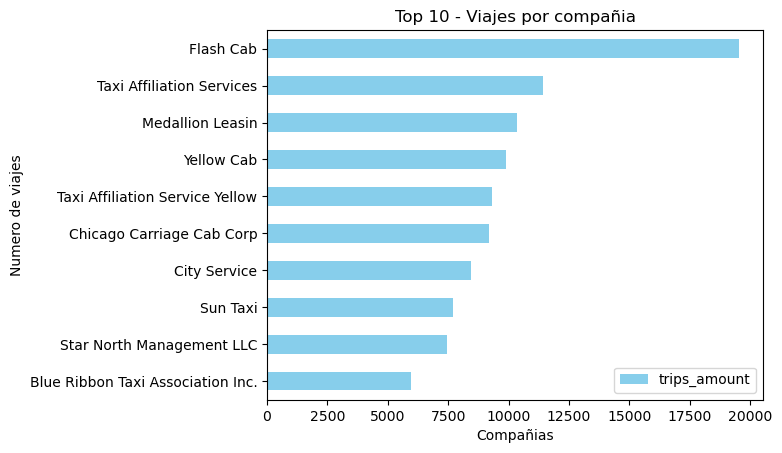

In [73]:
#Analisis top 10 compañias
top_10_company.sort_values(by="trips_amount",ascending=True).plot(kind="barh",x="company_name",y="trips_amount",color="skyblue")
plt.title("Top 10 - Viajes por compañia")
plt.xlabel("Compañias")
plt.ylabel("Numero de viajes")

top_10_company.describe()

,average_trips
count,10.000000
mean,4324.986667
std,3530.183508
min,1259.766667
25%,1649.633333
50%,2483.933333
75%,6289.416667
max,10727.466667


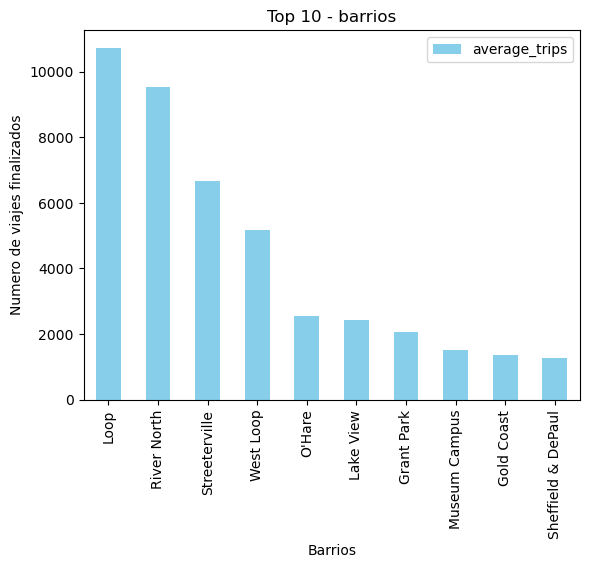

In [74]:
#Analisis top 10 barrios
top_10_dropoff_trips.plot(kind="bar",x="dropoff_location_name",y="average_trips",color="skyblue")
plt.title("Top 10 - barrios")
plt.xlabel("Barrios")
plt.ylabel("Numero de viajes finalizados")

top_10_dropoff_trips.describe()

##### Conclusiones:
* Flash Cab es la compañia que lidera el top 10 con un numero de viajes de 19558 y Blue Ribbon Taxi Asscociation INC. es el numero de 10 con 5953.
* Tambien podemos observar que el promedio de viajes por compañia es de 9927 sin embargo vemos que Flash Cab duplica este valor, tener este dato es interesante.
* Del grafico "Top 10 - Barrios" podemos concluir que los barrios como West Loop, Streeterville, River North y Loop tienen mayor preferencia respecto a destinos finales siendo este ultimo Loop el que encabeza el top.

## Prueba de hipotesis

### Analisis exploratorio de datos

In [75]:
### importamos el df
trips_loop_ohare = pd.read_csv("moved_project_sql_result_07.csv")
print(trips_loop_ohare.head())
print()
### Visualizamos sin hay algun dato vacio o tipo de dato
print(trips_loop_ohare.info())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


### Trabajamos la hipotesis

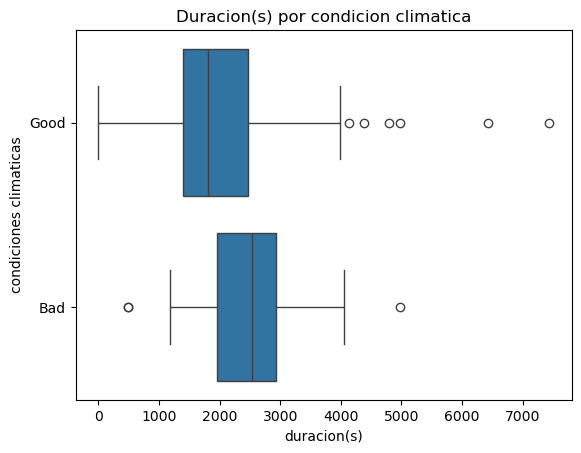

In [76]:
#exploracion de diagrama de cajas
sns.boxplot(x="duration_seconds",y="weather_conditions",data=trips_loop_ohare).set_title("Duracion(s) por condicion climatica")
plt.xlabel("duracion(s)")
plt.ylabel("condiciones climaticas")
plt.show()

In [77]:
#Eliminamos los outliers 
Q1=trips_loop_ohare["duration_seconds"].quantile(0.25)
Q3=trips_loop_ohare["duration_seconds"].quantile(0.75)
IQR=Q3-Q1

In [78]:
#Definimos nuevos limites
limite_inferior = Q1-(1.5*IQR)
limite_superior = Q3+(1.5*IQR)

In [79]:
#Datos sin outliers
datos_sin_outliers = trips_loop_ohare.query("duration_seconds <= @limite_superior")
datos_sin_outliers = datos_sin_outliers.query("duration_seconds >=@limite_inferior")

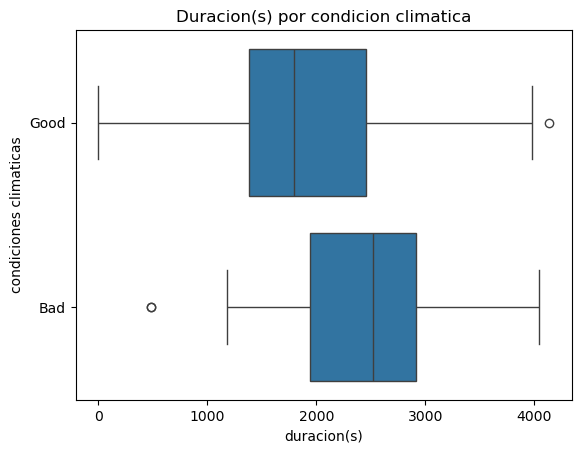

In [80]:
#Graficamos nuevamente

sns.boxplot(x="duration_seconds",y="weather_conditions",data=datos_sin_outliers).set_title("Duracion(s) por condicion climatica")
plt.xlabel("duracion(s)")
plt.ylabel("condiciones climaticas")
plt.show()

### Evaluacion de varianzas


In [81]:
#Probemos la hipotesis

from scipy import stats as st
alpha = 0.5
condicion_good = datos_sin_outliers.query('weather_conditions == "Good"')["duration_seconds"]
condicion_bad = datos_sin_outliers.query('weather_conditions == "Bad"')["duration_seconds"]

Antes de realizar una prueba ttest_ind de comparar promedios, primero realicemos una prueba de varianzas para asignar un valora a equal_Var.

h0 = Las varianzas de viajes segun la condiciones climaticas de Good y Bad son iguales.

h1 = Las varianzas de viajes de Good y Bad segun la condiciones climaticas  son diferentes.

In [82]:
#Mostremos los resultados
results = st.levene(condicion_good,condicion_bad)
print("p-value",results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value 0.6196707782686355
No podemos rechazar la hipotesis nula


Ahora si describamos la hipotesis

h0 = Los promedios de viajes segun la condiciones climaticas de Good y Bad son iguales.

h1 = Los promedios de Good y Bad segun la condiciones climaticas  son diferentes.

In [83]:
#Mostremos los resultados
results = st.ttest_ind(condicion_good,condicion_bad,equal_var=True)
print("p-value",results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value 1.2430038032744411e-13
Rechazamos la hipotesis nula


#### Conclusion:
* Ya que se rechazo la hipotesis nula podemos concluir que entre los promedios de los viajes de las condiciones climaticas "Good" y "Bad" son diferentes.
* Podemos indicar tambien que las condiciones climaticas influyen en el promedio de viajes segun las condiciones climaticas.